In [1]:
#Reference  https://towardsdatascience.com/multi-class-object-classification-for-retail-products-aa4ecaaaa096

!git clone https://github.com/abhinavsagar/Grocery-Product-Classification.git

Cloning into 'Grocery-Product-Classification'...
remote: Enumerating objects: 5071, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 5071 (delta 14), reused 0 (delta 0), pack-reused 5047
Receiving objects: 100% (5071/5071), 512.94 MiB | 17.74 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (4956/4956), done.
Encountered 4951 file(s) that should have been pointers, but weren't:
	BEANS/BEANS0000.png
	BEANS/BEANS0001.png
	BEANS/BEANS0002.png
	BEANS/BEANS0003.png
	BEANS/BEANS0004.png
	BEANS/BEANS0005.png
	BEANS/BEANS0006.png
	BEANS/BEANS0007.png
	BEANS/BEANS0008.png
	BEANS/BEANS0009.png
	BEANS/BEANS0010.png
	BEANS/BEANS0011.png
	BEANS/BEANS0012.png
	BEANS/BEANS0013.png
	BEANS/BEANS0014.png
	BEANS/BEANS0015.png
	BEANS/BEANS0016.png
	BEANS/BEANS0017.png
	BEANS/BEANS0018.png
	BEANS/BEANS0019.png
	BEANS/BEANS0020.png
	BEANS/BEANS0021.png
	BEANS/BEANS0022.png
	BEANS/BEANS0023.png
	BEANS/BEANS0024.png
	BEAN

In [ ]:
!pip install pip install scipy==1.1.0
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn

from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scipy
  Running setup.py clean for scipy
  error: subprocess-exited-with-error
  
  × python setup.py clean did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed cleaning build dir for scipy
Failed to build scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  error: subprocess-exi

<ipython-input-3-933082bc5310>:25: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom


ImportError: ignored

In [ ]:

from imageio import imread

from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers

ImportError: ignored

In [ ]:

#from keras.preprocessing.image import save_img
from tensorflow.keras.utils import load_img, save_img

from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler


In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [ ]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
Input='/content/Grocery-Product-Classification'
beans = Input+'/BEANS'
cake = Input+'/CAKE'
candy = Input+'/CANDY'
cereal = Input+'/CEREAL'
chips = Input+'/CHIPS'
chocolate = Input+'/CHOCOLATE'
coffee = Input+'/COFFEE'
corn = Input+'/CORN'
fish = Input+'/FISH'
flour = Input+'/FLOUR'
honey = Input+'/HONEY'
jam = Input+'/JAM'
juice = Input+'/JUICE'
milk = Input+'/MILK'
nuts = Input+'/NUTS'
oil = Input+'//OIL'
pasta = Input+'/PASTA'
rice = Input+'/RICE'
soda = Input+'/SODA'
spices = Input+'/SPICES'
sugar = Input+'/SUGAR'
tea = Input+'/TEA'
tomato_sauce = Input+'/TOMATO_SAUCE'
vinegar = Input+'/VINEGAR'
water = Input+'/WATER'

X = []
Z = []
imgsize = 150


training_data('beans',beans)
training_data('cake',cake)
training_data('candy',candy)
training_data('cereal',cereal)
training_data('chips',chips)
training_data('chocolate',chocolate)
training_data('coffee',coffee)
training_data('corn',corn)
training_data('fish',fish)
training_data('flour',flour)
training_data('honey',honey)
training_data('jam',jam)
training_data('juice',juice)
training_data('milk',milk)
training_data('nuts',nuts)
training_data('oil',oil)
training_data('psata',pasta)
training_data('rice',rice)
training_data('soda',soda)
training_data('spices',spices)
training_data('sugar',sugar)
training_data('tea',tea)
training_data('tomato sauce',tomato_sauce)
training_data('vinegar',vinegar)
training_data('water',water)


100%|██████████| 262/262 [00:00<00:00, 299.84it/s]


In [ ]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,25)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

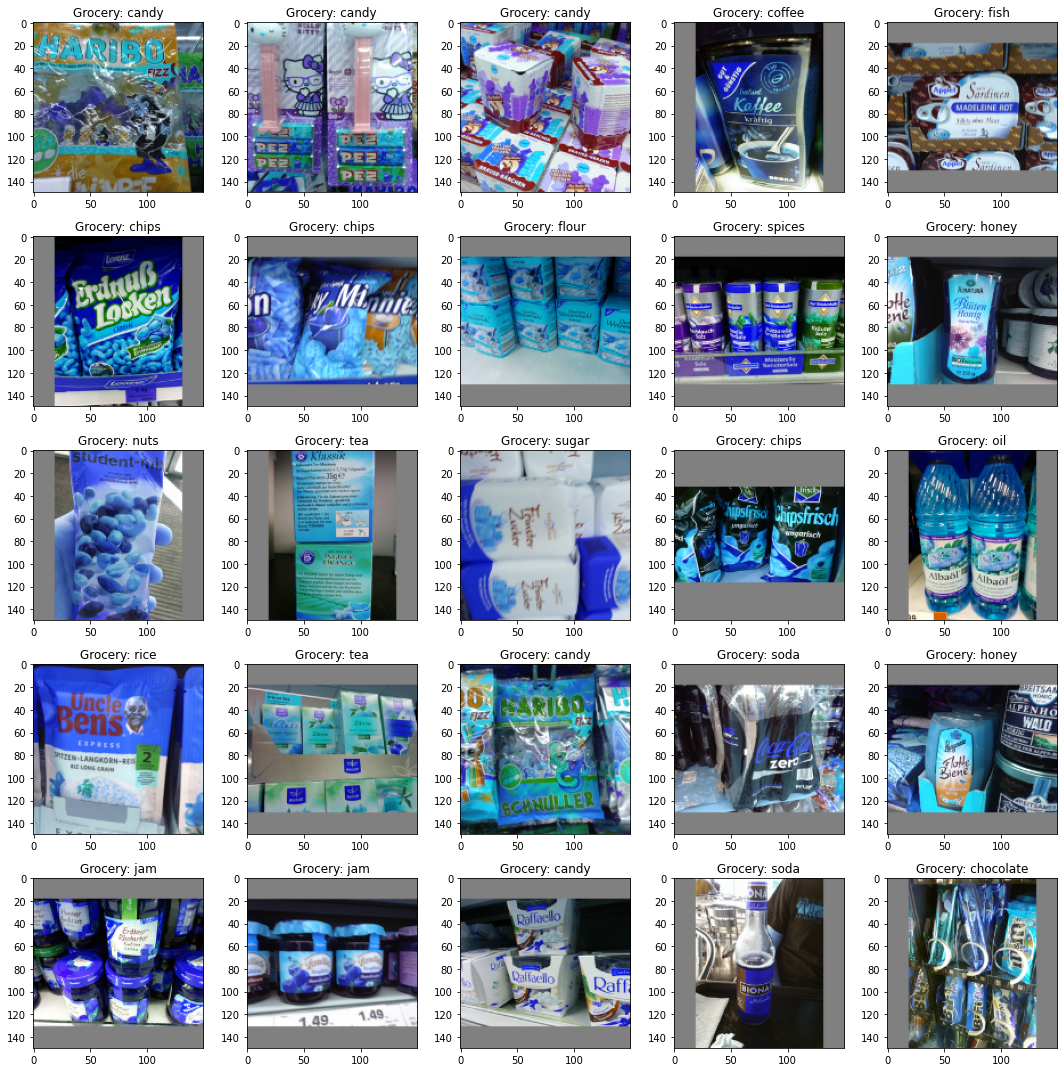

In [ ]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Grocery: '+Z[l])
        
plt.tight_layout()

58889256/58889256 [==============================] - 0s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7fa77992b5b0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fa7799c2190> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fa77998e640> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fa7790badf0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fa77c6464f0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fa77907a0a0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fa779081df0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fa779081a60> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fa779088070> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fa77800ab50> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fa779088580> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fa77800a190> False
<keras.layers.convolutional.con

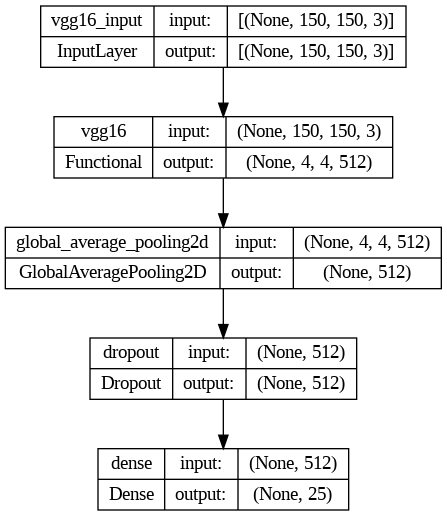

In [ ]:
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(25,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)
reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]
